In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
from plotly.offline import plot
import plotly.graph_objects as go
#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

ModuleNotFoundError: No module named 'pandas'

In [24]:
cil = pd.read_csv('COALINDIA.csv')
cil.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Unnamed: 7
0,11/4/2010,291.00,344.9,291.00,342.0,342.55,479716245,NaN
1,11/5/2010,343.00,356.5,343.00,348.3,349.85,31927173,NaN
2,11/8/2010,351.80,355.9,329.50,331.4,330.75,46932779,NaN
3,11/9/2010,330.15,333.4,325.00,325.4,326.05,23741956,NaN
4,11/10/2010,325.40,327.8,320.05,321.3,322.80,21057129,NaN


In [25]:
cil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2598 entries, 0 to 2597
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2598 non-null   object 
 1   Open        2598 non-null   float64
 2   High        2598 non-null   float64
 3   Low         2598 non-null   float64
 4   Close       2598 non-null   float64
 5   Adj Close   2598 non-null   float64
 6   Volume      2598 non-null   int64  
 7   Unnamed: 7  0 non-null      float64
dtypes: float64(6), int64(1), object(1)
memory usage: 162.5+ KB


In [26]:
cil['Date'] = pd.to_datetime(cil['Date'])

In [27]:
print(f'Dataframe contains stock prices between {cil.Date.min()} {cil.Date.max()}') 
print(f'Total days = {(cil.Date.max()  - cil.Date.min()).days} days')

Dataframe contains stock prices between 2010-11-04 00:00:00 2021-04-30 00:00:00
Total days = 3830 days


In [28]:
cil.describe()

,Open,High,Low,Close,Adj Close,Volume,Unnamed: 7
count,2598.000000,2598.000000,2598.000000,2598.000000,2598.000000,2.598000e+03,0.0
mean,288.234007,291.891744,284.240878,287.950943,287.953464,5.617118e+06,NaN
std,74.132769,75.064219,73.238459,74.098662,74.144478,1.105497e+07,NaN
min,110.850000,112.450000,109.550000,110.600000,110.550000,2.143700e+04,NaN
25%,254.737500,257.012500,251.187500,254.325000,254.087500,2.236566e+06,NaN
50%,300.100000,303.925000,295.950000,300.000000,299.950000,3.471441e+06,NaN
75%,341.200000,345.462500,336.137500,341.825000,341.637500,6.321588e+06,NaN
max,445.000000,447.100000,437.000000,443.900000,443.400000,4.797162e+08,NaN


<Axes: >

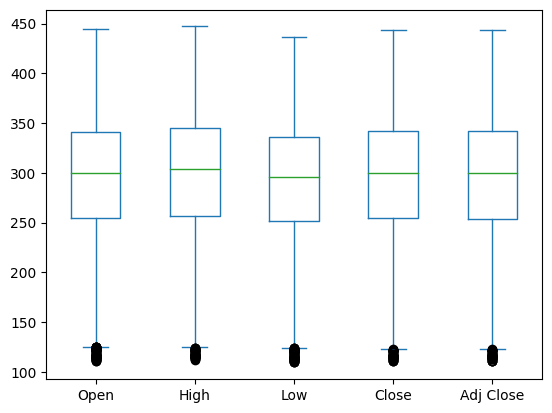

In [29]:
cil[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [31]:
# Setting the layout for our plot
layout = go.Layout(
    title='Stock Prices of Coal India Limited',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

tesla_data = [{'x':cil['Date'], 'y':cil['Close']}]
plot = go.Figure(data=tesla_data, layout=layout)

In [32]:
iplot(plot)

In [12]:
# Building the regression model
from sklearn.model_selection import train_test_split

#For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [13]:
#Split the data into train and test sets
X = np.array(cil.index).reshape(-1,1)
Y = cil['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [14]:
scaler = StandardScaler().fit(X_train)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
#Creating a linear model
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [17]:
#Plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
tesla_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=tesla_data, layout=layout)

In [33]:
iplot(plot2)

In [19]:
#Calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.6047560343951172	0.6229738088748404
MSE       2157.1951084670654	2089.902111483963

